In [5]:
import cv2
from pylab import *
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import load_model
import tensorflow as tf
# 加载训练好的模型
model = load_model(r"C:/Users/Administrator/Desktop/English/权重/PSE-Res-dense5-18/dense.h5")

model.summary()  # 打印模型.查看参数及层的名称
# 设置为测试阶段


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 48)   1296        input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_1 (AveragePoo (None, 31, 31, 48)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 48)           0           average_pooling2d_1[0][0]        
____________________________________________________________________________________________

(1, 31, 31, 48)


IndexError: too many indices for array

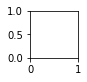

In [8]:
K.set_learning_phase(0)
graph = tf.get_default_graph()

test_path = r"C:/Users/Administrator/Desktop/English/look/yes1.jpg"
image = cv2.imread(test_path )
image = cv2.resize(image,(64,64))
#image = cv2.resize(image)
image = image .astype('float')/255.0
image = np.expand_dims(image ,0)

def get_layer_feature(img, model, layer_name):
    with graph.as_default():
        layer_fn = K.function([model.get_input_at(0)],[model.get_layer(layer_name).output])
        layer_output = layer_fn([img, 0])[0]
        return layer_output


layer_output = get_layer_feature(image , model, 'multiply_1') # conv2d_3 为想观看的卷积层的名称
#layer_output1 = np.sum(layer_output, axis=-1)

print(np.shape(layer_output))
plt.figure(figsize=(8, 4))
plt.title("shallow output features")
for x in range(0, 32):
    ax = plt.subplot(4, 8, x + 1)
    plt.imshow(layer_output1[0,:,:,x],cmap="viridis")  # 需要和该层输出的图片尺寸对应

        # 去除坐标轴
    plt.xticks([])
    plt.yticks([])
        # 去除黑框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
plt.tight_layout()  # 会自动调整子图参数，使之填充整个图像区域
plt.show()

    


   